In [1]:
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from utils import *
plt.style.use('seaborn-muted')
from matplotlib import patches
import csaps
import warnings
warnings.filterwarnings("ignore")

# An Empirical Example from EEP 147

Let's take a look at an empirical example of production. The dataset for this section comes from EEP 147: Regulation of Energy and the Environment.

In [2]:
ESG_table = Table.read_table('ESGPorfolios_forcsv.csv').select(
    "Group", "Group_num", "UNIT NAME", "Capacity_MW", "Total_Var_Cost_USDperMWH"
).sort("Total_Var_Cost_USDperMWH", descending = False).relabel(4, "Average Variable Cost")
ESG_table

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Old Timers,7,BIG CREEK,1000,0
Fossil Light,8,HELMS,800,0.5
Fossil Light,8,DIABLO CANYON 1,1000,11.5
Bay Views,4,MOSS LANDING 6,750,32.56
Bay Views,4,MOSS LANDING 7,750,32.56
Old Timers,7,MOHAVE 1,750,34.5
Old Timers,7,MOHAVE 2,750,34.5
Big Coal,1,FOUR CORNERS,1900,36.5
Bay Views,4,MORRO BAY 3&4,665,36.61
East Bay,6,PITTSBURGH 5&6,650,36.61


This table shows some electricity generation plants in California and their costs. The `Capacity` is the output the firm is capable of producing. The `Average Variable Cost` shows the minimum variable cost per megawatt (MW) produced. At a price below AVC, the firm supplies nothing. At a price above the AVC, the firm can supply up to its capacity. Being a profit-maximising firm, it will try to supply its full capacity. 

First, lets look at just the Big Coal producers and understand this firm's particular behavior.

In [3]:
selection = 'Big Coal'
Group = ESG_table.where("Group", are.equal_to(selection))
Group

Group,Group_num,UNIT NAME,Capacity_MW,Average Variable Cost
Big Coal,1,FOUR CORNERS,1900,36.5
Big Coal,1,HUNTINGTON BEACH 1&2,300,40.5
Big Coal,1,REDONDO 5&6,350,41.94
Big Coal,1,REDONDO 7&8,950,41.94
Big Coal,1,HUNTINGTON BEACH 5,150,66.5
Big Coal,1,ALAMITOS 7,250,73.72


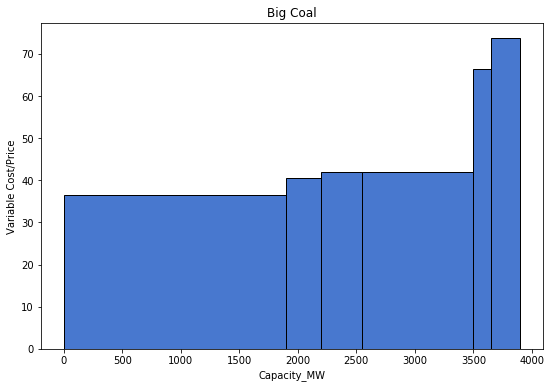

In [4]:
# Make the plot
plt.figure(figsize=(9,6))
plt.bar(new_x_group, height_group, width=width_group, edgecolor = "black")
# Add title and axis names
plt.title(selection)
plt.xlabel('Capacity_MW')
plt.ylabel('Variable Cost/Price')

plt.show()

We have created the Big Coal supply curve. It shows the price of electricity, and the quantity supplied at those prices, which depends on variable cost. For example, at any variable cost equal to or above 36.5, the producer `FOUR CORNERS` (the one with the lowest production costs) will supply, and so on. Notably, we observe that the supply curve is also upward sloping since we need higher prices to entice producers with higher variasble costs to produce. 

Price: $30
No production


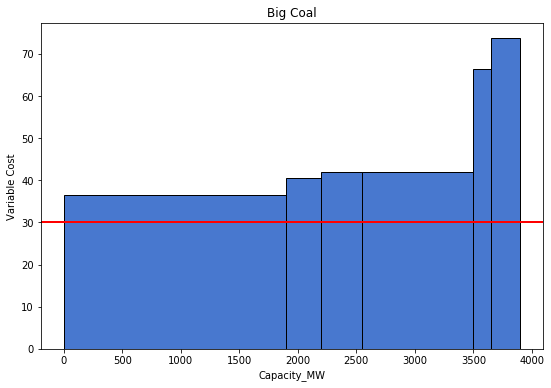

In [5]:
group_plot(30)

Price: $37
Total Production/Market Supply:  1900

Suppliers:  ['FOUR CORNERS']


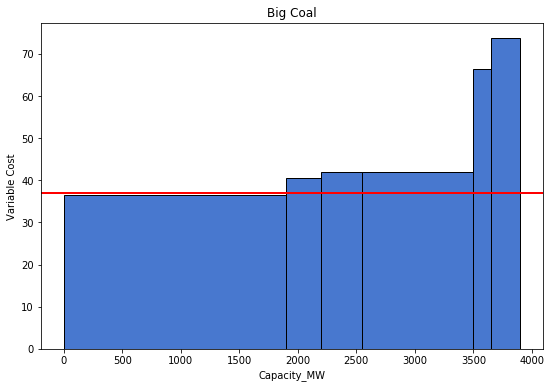

In [6]:
group_plot(37)

Price: $50
Total Production/Market Supply:  3500

Suppliers:  ['FOUR CORNERS' 'HUNTINGTON BEACH 1&2' 'REDONDO 5&6' 'REDONDO 7&8']


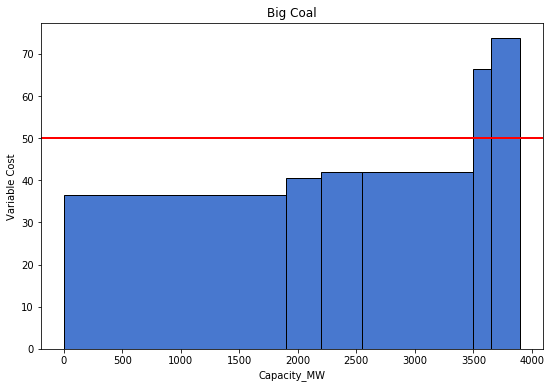

In [7]:
group_plot(50)

Now we will look at all the energy sources. They have been colored according to source for reference.

Price: $30
Total Production/Market Supply:  2800

Suppliers:  ['BIG CREEK' 'HELMS' 'DIABLO CANYON 1']


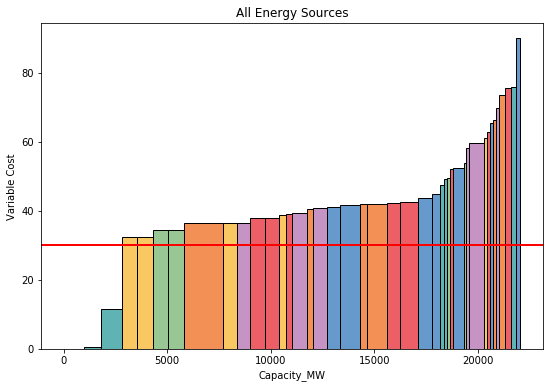

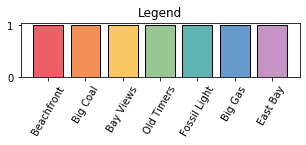

In [8]:
ESG_plot(30)

Price: $50
Total Production/Market Supply:  18650

Suppliers:  ['BIG CREEK' 'HELMS' 'DIABLO CANYON 1' 'MOSS LANDING 6' 'MOSS LANDING 7'
 'MOHAVE 1' 'MOHAVE 2' 'FOUR CORNERS' 'MORRO BAY 3&4' 'PITTSBURGH 5&6'
 'ORMOND BEACH 1' 'ORMOND BEACH 2' 'MORRO BAY 1&2' 'MANDALAY 1&2'
 'CONTRA COSTA 6&7' 'HUNTINGTON BEACH 1&2' 'PITTSBURGH 1-4'
 'EL SEGUNDO 3&4' 'ENCINA' 'REDONDO 5&6' 'REDONDO 7&8' 'COOLWATER'
 'ETIWANDA 1-4' 'SOUTH BAY' 'EL SEGUNDO 1&2' 'HUMBOLDT'
 'HUNTERS POINT 1&2' 'HIGHGROVE']


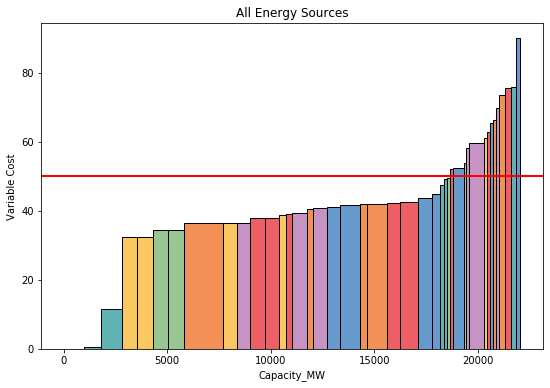

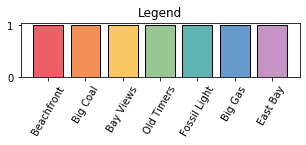

In [9]:
ESG_plot(50)

Look at the thin bars concentrated on the right end of the plot. These are plants with small capacities and high variable costs. Conversely, plants with larger capacities tend to have lower variable costs. Why might this be the case? Electricity production typically benefits from economies of scale: it is cheaper per unit when producing more units. Perhaps the high fixed cost required for electricity production, such as for equipment and land, is the reason behind this phenomenon. 